In [977]:
from sklearn import linear_model, metrics, preprocessing, pipeline, model_selection
from statsmodels.regression import quantile_regression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

#### Percentiles

In [1185]:
samples = np.random.normal(size=10000)

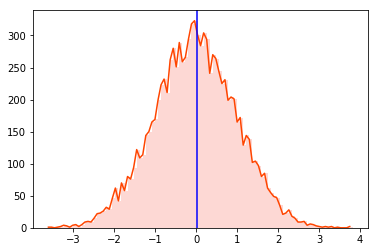

In [1186]:
patches = plt.hist(samples, bins=100, color='salmon', alpha=0.3) 
plt.plot(patches[1][:-1], patches[0], c='orangered')
plt.axvline(samples.mean(), c='b')

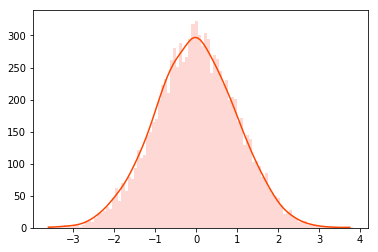

In [1187]:
from scipy.ndimage import filters

patches = plt.hist(samples, bins=100, color='salmon', alpha=0.3) 

smoothed = filters.gaussian_filter1d(patches[0].copy(), sigma=2.5)
plt.plot(patches[1][:-1], smoothed, c='orangered')

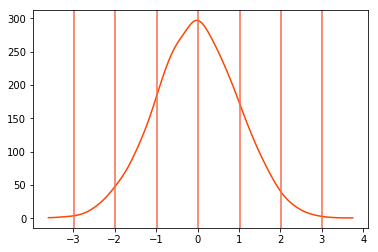

In [1202]:
plt.plot(patches[1][:-1], smoothed, c='orangered')
plt.axvline(samples.mean()/2)

fiftyth_percentile = samples.mean()
ninty_fifth_percentile = (fiftyth_percentile/5) * 9 + (fiftyth_percentile/10)
fifth_percentile = fiftyth_percentile/10

plt.axvline(samples.mean()+samples.std())
plt.axvline(samples.mean()-samples.std())
plt.axvline(samples.mean()+(samples.std()*2))
plt.axvline(samples.mean()-(samples.std()*2))
plt.axvline(samples.mean()+(samples.std()*3))
plt.axvline(samples.mean()-(samples.std()*3))

#### Generating Non-Linear Random Data

In [829]:
lower_bounds = numpy.random.normal(50, size=100)
standard_deviations = numpy.random.uniform(80, size=100)

X = numpy.random.uniform(lower_bounds, size=100)
Y = 1 + (X**2) + numpy.random.normal(loc=4, scale=standard_deviations)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


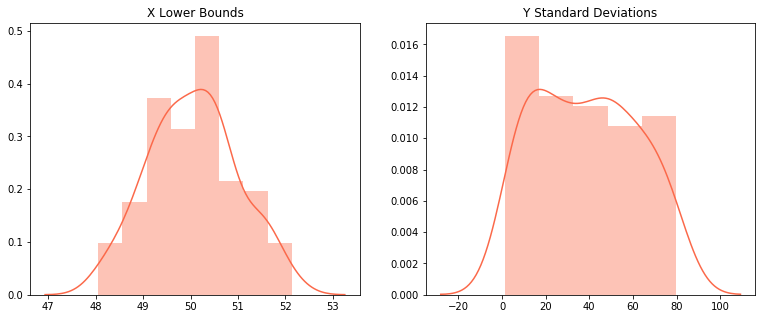

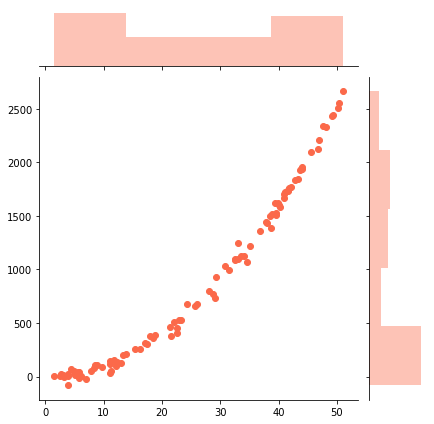

In [830]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].set_title("X Lower Bounds")
sns.distplot(lower_bounds, ax=axes[0]
            )
axes[1].set_title("Y Standard Deviations")
sns.distplot(standard_deviations, ax=axes[1])

sns.jointplot(X, Y)

#### Structuring Data

In [831]:
data = pd.DataFrame({'X': X, 'Y': Y})
model = statsmodels.regression.quantile_regression.QuantReg(Y, X).fit()

#### StatsModel OLS

In [834]:
model = sm.OLS(Y, X).fit()

In [835]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1680.
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           6.56e-64
Time:                        02:58:16   Log-Likelihood:                -707.04
No. Observations:                 100   AIC:                             1416.
Df Residuals:                      99   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            39.2018      0.956     40.986      0.000      37.304      41.100
==============================================================================
Omnibus:                       15.970   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.400
Skew:                           1.029   Prob(JB):                     0.000101
Kurtosis:                       3.421   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

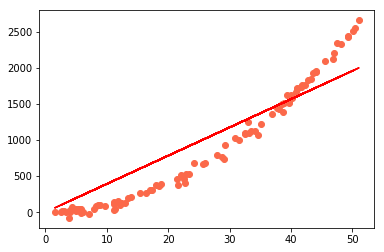

In [836]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X), c='r')

#### SciKit-Learn Linear Regression

array([51.13457247])

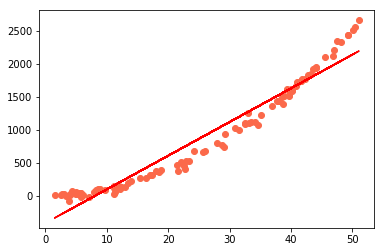

In [1045]:
model = linear_model.LinearRegression()
model.fit(X[:, None], Y)

plt.scatter(X, Y)
plt.plot(X, model.predict(np.array([X]).T), c='r')

model.coef_

array([51.13457247])

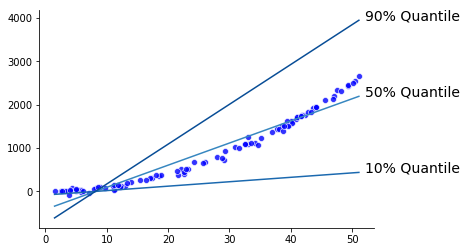

In [1058]:
model = linear_model.LinearRegression()
model.fit(np.array([X]).T, Y)

least_squares_distances = model.predict(np.array([X]).T)
tenth = (least_sqaures_distances/5)
ninetyth = tenth * 9

blues = sns.color_palette("Blues", 8)

sns.scatterplot(X, Y, alpha=0.8, color='b')
sns.lineplot(X, least_squares_distances, color=blues[5])
sns.lineplot(X, tenth, color=blues[6])
sns.lineplot(X, ninetyth, color=blues[7])

plt.annotate("10% Quantile", xy=(max(X)+1, max(tenth)+0.6), fontsize=14)
plt.annotate("50% Quantile", xy=(max(X)+1, max(least_squares_distances)+0.5), fontsize=14)
plt.annotate("90% Quantile", xy=(max(X)+1, max(ninetyth)+0.6), fontsize=14)

sns.despine(right=True)
            
model.coef_

In [1064]:
(Y < least_squares_distances).sum()/Y.size

0.54

In [1065]:
(Y < tenth).sum()/Y.size

0.03

In [1066]:
(Y < ninetyth).sum()/Y.size

0.78

#### Fitting Non-Linear Data With Linear Regression

array([ 0.        , -0.31511373,  1.01264112])

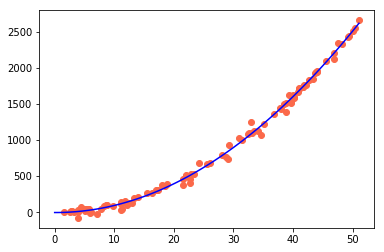

In [1072]:
processor = pipeline.make_pipeline(preprocessing.PolynomialFeatures(2), linear_model.LinearRegression())
processor.fit(X[:, np.newaxis], Y)

xfit = np.linspace(0, max(X), X.size)
yfit = processor.predict(xfit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(xfit, yfit, c='b');

processor.get_params()['linearregression'].coef_

array([ 0.        , -0.31511373,  1.01264112])

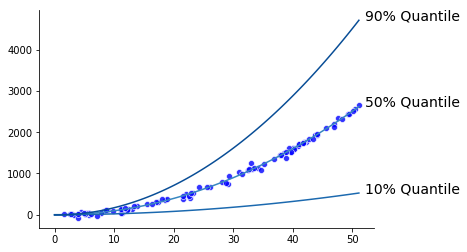

In [1078]:
processor = pipeline.make_pipeline(preprocessing.PolynomialFeatures(2), linear_model.LinearRegression())
processor.fit(X[:, np.newaxis], Y)

sample_space = np.linspace(0, max(X), X.size)

least_squares_distances = processor.predict(sample_space[:, np.newaxis])
tenth = (least_squares_distances/5)
ninetyth = tenth * 9

sns.scatterplot(X, Y, alpha=0.8, color='b')
sns.lineplot(sample_space, least_squares_distances, color=blues[5])
sns.lineplot(sample_space, tenth, color=blues[6])
sns.lineplot(sample_space, ninetyth, color=blues[7])

plt.annotate("10% Quantile", xy=(max(X)+1, max(tenth)), fontsize=14)
plt.annotate("50% Quantile", xy=(max(X)+1, max(least_squares_distances)), fontsize=14)
plt.annotate("90% Quantile", xy=(max(X)+1, max(ninetyth)), fontsize=14)

sns.despine(right=True)
            
processor.get_params()['linearregression'].coef_

In [1079]:
(Y < least_squares_distances).sum()/Y.size

0.49

In [1080]:
(Y < tenth).sum()/Y.size

0.22

In [1081]:
(Y < ninetyth).sum()/Y.size

0.64

#### Pipeline For Fitting To Non-Linear Functions 

In [966]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [1008]:
processor = pipeline.make_pipeline(preprocessing.PolynomialFeatures(2), linear_model.LinearRegression())
processor.fit(X[:, np.newaxis], Y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [1009]:
processor.get_params()['linearregression'].coef_

array([ 0.        , -0.31511373,  1.01264112])

In [1010]:
train_regression = processor.predict(X_train[:, np.newaxis])
train_tenth = (train_regression/5)
train_ninetyth = train_tenth * 9

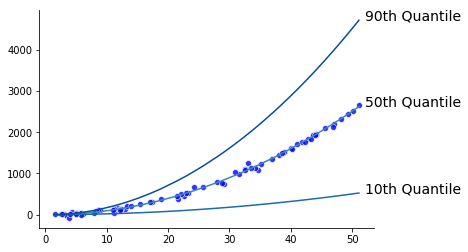

In [1027]:
sns.scatterplot(X_train, y_train, alpha=0.8, color='b')
sns.lineplot(X_train, train_regression, color=blues[5])
sns.lineplot(X_train, train_tenth, color=blues[6])
sns.lineplot(X_train, train_ninetyth, color=blues[7])

plt.annotate("10th Quantile", xy=(max(X)+1, max(train_tenth)+0.6), fontsize=14)
plt.annotate("50th Quantile", xy=(max(X)+1, max(train_regression)+0.5), fontsize=14)
plt.annotate("90th Quantile", xy=(max(X)+1, max(train_ninetyth)+0.6), fontsize=14)

sns.despine(right=True)

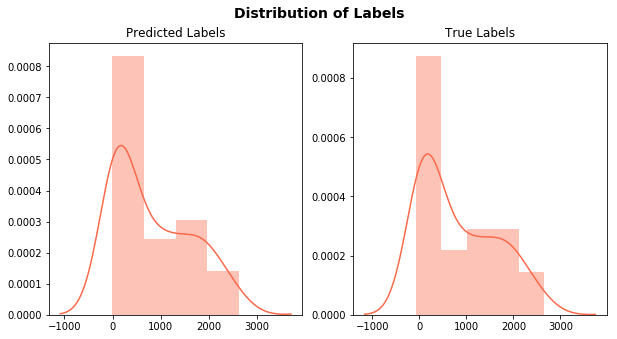

In [1020]:
fig, (ax, bx) = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(train_regression, ax=ax)
sns.distplot(y_train, ax=bx)

fig.suptitle("Distribution of Labels", fontweight='bold', fontsize=14)

ax.set_title("Predicted Labels")
bx.set_title("True Labels");

In [981]:
metrics.mean_squared_error(y_train, train_regression)

1800.4870193442919

#### Testing Regression Accuracy

In [971]:
test_regression = processor.predict(X_test[:, np.newaxis])
test_tenth = (test_regression/5)
test_ninetyth = test_tenth * 9

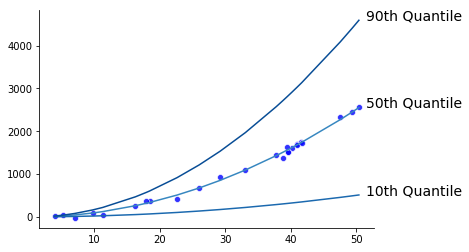

In [1028]:
sns.scatterplot(X_test, y_test, alpha=0.8, color='b')
sns.lineplot(X_test, test_regression, color=blues[5])
sns.lineplot(X_test, test_tenth, color=blues[6])
sns.lineplot(X_test, test_ninetyth, color=blues[7])

plt.annotate("10th Quantile", xy=(max(X)+0.4, max(test_tenth)+1), fontsize=14)
plt.annotate("50th Quantile", xy=(max(X)+0.4, max(test_regression)+1), fontsize=14)
plt.annotate("90th Quantile", xy=(max(X)+0.4, max(test_ninetyth)+1), fontsize=14)

sns.despine(right=True)

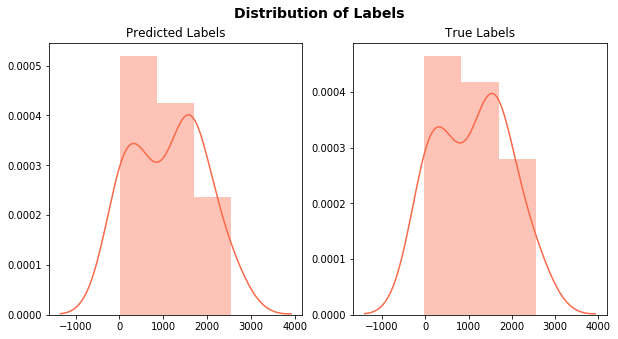

In [1019]:
fig, (ax, bx) = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(test_regression, ax=ax)
sns.distplot(y_test, ax=bx)

fig.suptitle("Distribution of Labels", fontweight='bold', fontsize=14)

ax.set_title("Predicted Labels")
bx.set_title("True Labels");

In [980]:
metrics.mean_squared_error(y_test, test_regression)

2521.1524344001523

#### Deliberate Overfitting

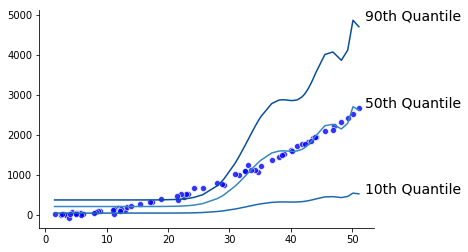

In [1084]:
processor = pipeline.make_pipeline(preprocessing.PolynomialFeatures(23), linear_model.LinearRegression())
processor.fit(X_train[:, np.newaxis], y_train)

overfit_train_regression = processor.predict(X_train[:, np.newaxis])
overfit_train_tenth = (overfit_train_regression/5)
overfit_train_ninetyth = overfit_train_tenth * 9

sns.scatterplot(X_train, y_train, alpha=0.8, color='b')
sns.lineplot(X_train, overfit_train_regression, color=blues[5])
sns.lineplot(X_train, overfit_train_tenth, color=blues[6])
sns.lineplot(X_train, overfit_train_ninetyth, color=blues[7])

plt.annotate("10th Quantile", xy=(max(X)+1, max(overfit_train_tenth)+0.6), fontsize=14)
plt.annotate("50th Quantile", xy=(max(X)+1, max(overfit_train_regression)+0.5), fontsize=14)
plt.annotate("90th Quantile", xy=(max(X)+1, max(overfit_train_ninetyth)+0.6), fontsize=14)

sns.despine(right=True)

In [1092]:
y_train.size

75

In [1094]:
(y_train < overfit_train_regression).sum(), (y_train < overfit_train_regression).sum()/y_train.size

(44, 0.5866666666666667)

In [1096]:
(y_train < overfit_train_tenth).sum(), (y_train < overfit_train_tenth).sum()/y_train.size

(13, 0.17333333333333334)

In [1097]:
(y_train < overfit_train_ninetyth).sum(), (y_train < overfit_train_ninetyth).sum()/y_train.size

(66, 0.88)

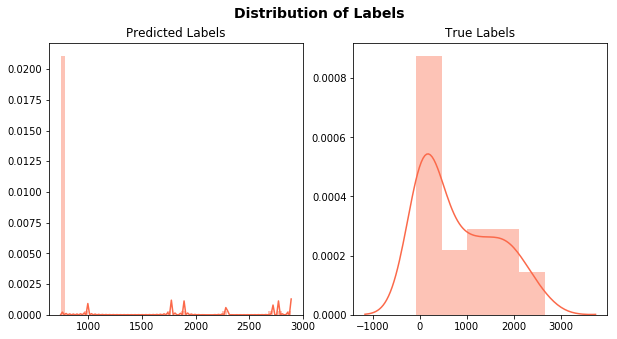

In [1018]:
fig, (ax, bx) = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(overfit_train_regression, ax=ax)
sns.distplot(y_train, ax=bx)

fig.suptitle("Distribution of Labels", fontweight='bold', fontsize=14)

ax.set_title("Predicted Labels")
bx.set_title("True Labels");

In [1015]:
metrics.mean_squared_error(y_train, overfit_train_regression)

104557.18869133767